In [41]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline



In [42]:
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from pandas import DataFrame

In [43]:
import os
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_3_forecast/_3_ARIMA/forecast_ARIMA_py/")


In [4]:
#  Пример 1
#  
#------------------------

In [5]:
#  df = pd.read_csv('1_wn.dat', sep='')
zzz = pd.read_csv('1_wn.dat')
zzz.head()

,V1
0,0.01
1,1.38
2,0.53
3,1.58
4,1.32


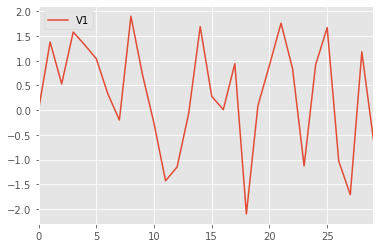

In [6]:
zzz.plot()
plt.show()

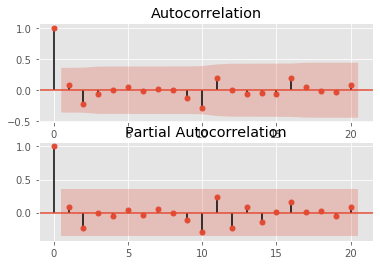

In [7]:
plt.figure()
plt.subplot(211)
plot_acf(zzz, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz, method='ywmle', lags=20, ax=plt.gca())
plt.show()

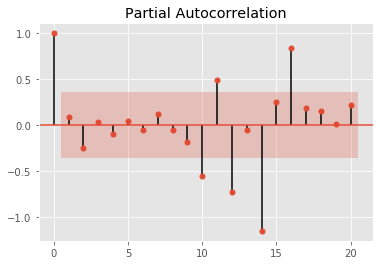

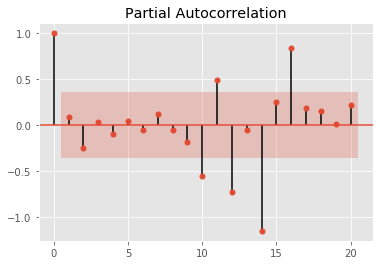

In [8]:
#  осторожно с выбором метода!
#  Вот что выйдет, если заменить method='ywmle' на method='ols'
plot_pacf(zzz["V1"], method='ols', lags=20)

In [9]:
 #  Вывод: белый шум
 #  Прогноз - среднее значение ряда   

In [10]:
#  Пример 2
#------------------------
#  белый шум


In [11]:
zzz = pd.read_csv('2_wnoise.dat')
zzz.head()

,V1
0,23
1,59
2,36
3,99
4,36


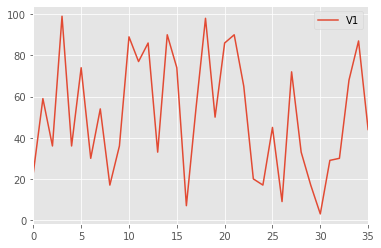

In [12]:
zzz.plot()
plt.show()

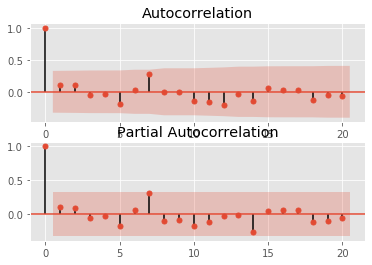

In [13]:
plt.figure()
plt.subplot(211)
plot_acf(zzz, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz, method='ywmle', lags=20, ax=plt.gca())
plt.show()

In [14]:
#  Вывод: белый шум
#  Прогноз - среднее значение ряда  

In [15]:
#  Пример 3
#------------------------
#  Dow-Jones index on 251 trading days ending 26 Aug 1994


In [16]:
zzz = pd.read_csv('3_dj.dat')
zzz.head()

,DJ
0,3651.0
1,3645.0
2,3626.0
3,3634.0
4,3620.5


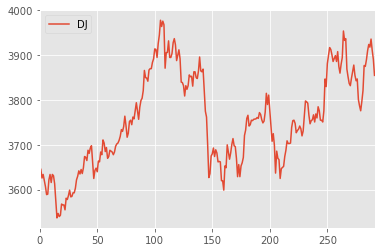

In [17]:
zzz.plot()
plt.show()

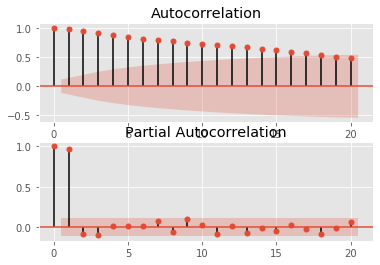

In [18]:
plt.figure()
plt.subplot(211)
plot_acf(zzz, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz, method='ywmle', lags=20, ax=plt.gca())
plt.show()

In [19]:
zzz_2 = zzz.diff(periods=1)

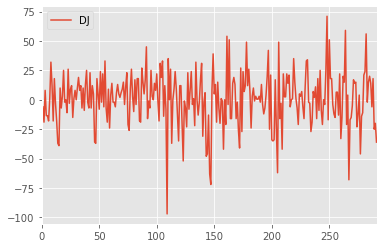

In [20]:
zzz_2.plot()
plt.show()

In [21]:
#  Процедура diff порождает пропуски
zzz_2.head()

,DJ
0,NaN
1,-6.0
2,-19.0
3,8.0
4,-13.5


In [22]:
zzz_2.tail()

,DJ
287,-6.0
288,18.0
289,-25.0
290,-20.0
291,-36.0


In [23]:
zzz_3 = zzz_2.dropna()

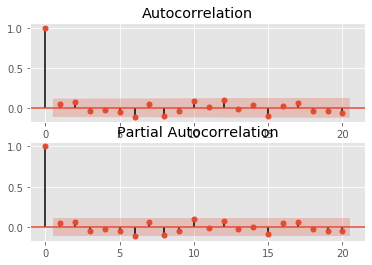

In [24]:
plt.figure()
plt.subplot(211)

plot_acf(zzz_3, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz_3, method='ywmle', lags=20, ax=plt.gca())
plt.show()

In [25]:
#  решение : случайное блуждание ARIMA(0,1,0)
#  Прогноз - последнее значение ряда 

Внимание:  случайное блуждание не выглядит случайным 

In [26]:
#  Пример 4
#------------------------
#  Daily closing IBM stock prices.


In [27]:
zzz = pd.read_csv('4_ibm2.dat')
zzz.head()

,V1
0,460
1,457
2,452
3,459
4,462


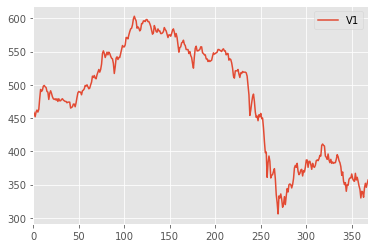

In [28]:
zzz.plot()
plt.show()

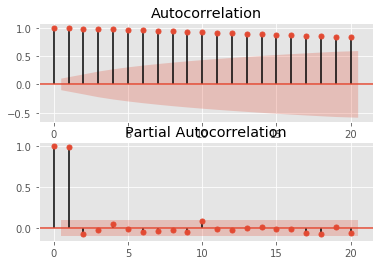

In [29]:
plt.figure()
plt.subplot(211)
plot_acf(zzz, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz, method='ywmle', lags=20, ax=plt.gca())
plt.show()

In [30]:
zzz_2 = zzz.diff(periods=1)

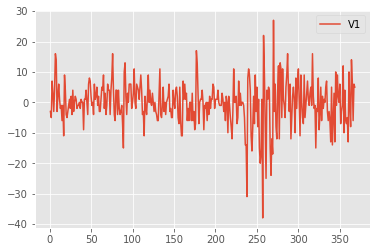

In [35]:
zzz_2.plot()
plt.show()

Есть намек на кластеризацию волатильности... <br>
Может лучше использовать GARCH?

In [31]:
zzz_3 = zzz_2.dropna()

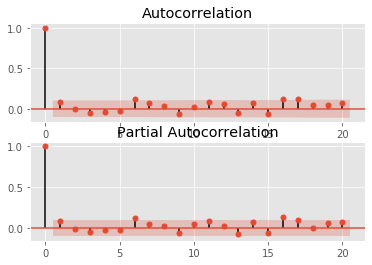

In [32]:
plt.figure()
plt.subplot(211)

plot_acf(zzz_3, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz_3, method='ywmle', lags=20, ax=plt.gca())
plt.show()

In [33]:
#  решение : случайное блуждание ARIMA(0,1,0)
#  Прогноз - последнее значение ряда 

In [35]:
#  Пример 5
#------------------------
#  Число забастовок в США с 1951 по 1980 год.


In [44]:
zzz = pd.read_csv('5_strike.dat', sep = ";")
zzz.head()

,V1,YEAR_,DATE_
0,4737,1951,1951
1,5117,1952,1952
2,5091,1953,1953
3,3468,1954,1954
4,4320,1955,1955


In [45]:
zzz = zzz["V1"]
zzz.head()

0    4737
1    5117
2    5091
3    3468
4    4320
Name: V1, dtype: int64

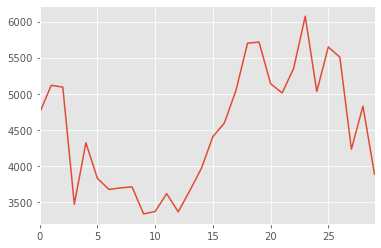

In [46]:
zzz.plot()
plt.show()

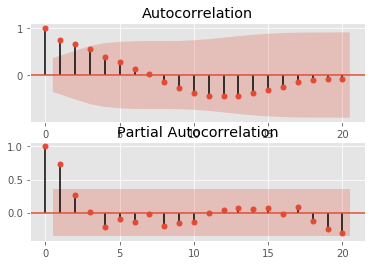

In [47]:
plt.figure()
plt.subplot(211)
plot_acf(zzz, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz, method='ywmle', lags=20, ax=plt.gca())
plt.show()


In [48]:
# модель
model = ARIMA(zzz, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                              ARMA Model Results                              
Dep. Variable:                     V1   No. Observations:                   30
Model:                     ARMA(1, 0)   Log Likelihood                -232.418
Method:                       css-mle   S.D. of innovations            553.295
Date:                Wed, 21 Apr 2021   AIC                            470.836
Time:                        17:08:10   BIC                            475.039
Sample:                             0   HQIC                           472.180
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4474.1700    339.071     13.195      0.000    3809.602    5138.738
ar.L1.V1       0.7250      0.118      6.132      0.000       0.493       0.957
                                    Roots           

In [49]:
#  Существует другой рецепт идентификации моделей: считаем число столбцов, 
#  выходящих за границу доверительного интервала    
#  Это никак не обосновано, но так делают...

#  модель
model_2 = ARIMA(zzz, order=(1,0,2))
model_fit_2 = model_2.fit(disp=0)
print(model_fit_2.summary())

                              ARMA Model Results                              
Dep. Variable:                     V1   No. Observations:                   30
Model:                     ARMA(1, 2)   Log Likelihood                -230.707
Method:                       css-mle   S.D. of innovations            518.946
Date:                Wed, 21 Apr 2021   AIC                            471.415
Time:                        17:08:16   BIC                            478.421
Sample:                             0   HQIC                           473.656
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.4122    393.933     11.437      0.000    3733.317    5277.507
ar.L1.V1       0.7959      0.129      6.152      0.000       0.542       1.049
ma.L1.V1      -0.3937      0.209     -1.882      0.0

Сравниваем модели

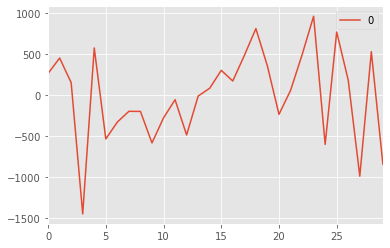

In [50]:
# анализ остатков
residuals = pd.DataFrame(model_fit.resid)

residuals.plot()
plt.show()


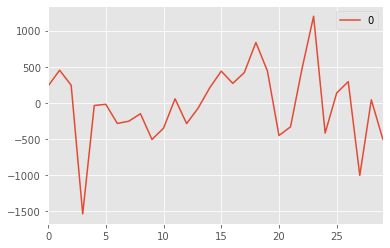

In [51]:
# анализ остатков
residuals_2 = pd.DataFrame(model_fit_2.resid)

residuals_2.plot()
plt.show()


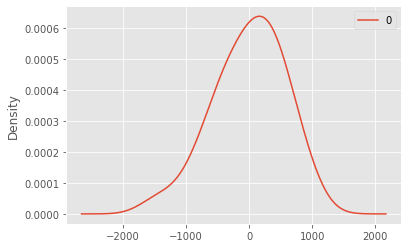

                 0
count    30.000000
mean     -6.309519
std     563.828946
min   -1453.365140
25%    -317.855054
50%      68.639903
75%     427.489894
max     962.687673


In [52]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

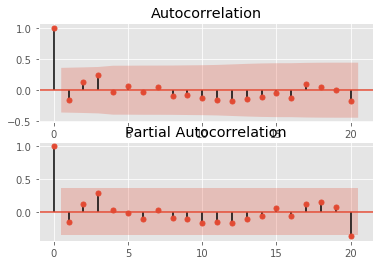

In [53]:
plt.figure()
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals, method='ywmle', lags=20, ax=plt.gca())
plt.show()


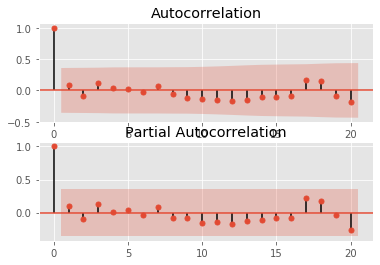

In [54]:
plt.figure()
plt.subplot(211)
plot_acf(residuals_2, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals_2, method='ywmle', lags=20, ax=plt.gca())
plt.show()


In [55]:
# А если попробовать модель
model_2 = ARIMA(zzz, order=(0,1,0))
model_fit_2 = model_2.fit(disp=0)
print(model_fit_2.summary())


                             ARIMA Model Results                              
Dep. Variable:                   D.V1   No. Observations:                   29
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -226.615
Method:                           css   S.D. of innovations            599.071
Date:                Wed, 21 Apr 2021   AIC                            457.231
Time:                        17:10:17   BIC                            459.965
Sample:                             1   HQIC                           458.087
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.3793    111.245     -0.264      0.794    -247.415     188.656


In [56]:
residuals_2 = pd.DataFrame(model_fit_2.resid)

residuals_2.plot()
plt.show()


TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

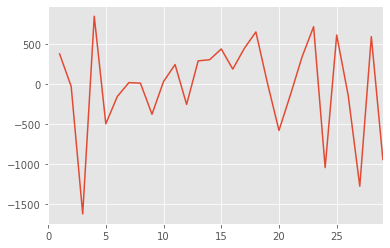

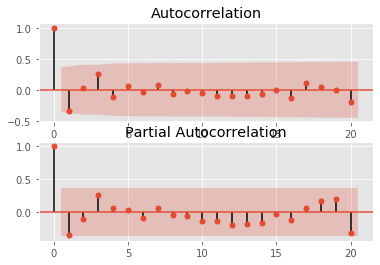

In [57]:
zzz_2 = zzz.diff(periods=1)

zzz_2.plot()
plt.show()

zzz_3 = zzz_2.dropna()

plt.figure()
plt.subplot(211)

plot_acf(zzz_3, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz_3, method='ywmle', lags=20, ax=plt.gca())
plt.show()

In [65]:
zzz_fit = model_fit.predict(0, (29+4))
zzz_fit

0     4474.257362
1     4664.742137
2     4940.236877
3     4921.387237
4     3744.734705
5     4362.422910
6     4003.554762
7     3893.356867
8     3908.581576
9     3918.731382
10    3646.861573
11    3671.511103
12    3850.582683
13    3667.886172
14    3880.307116
15    4103.602852
16    4424.046733
17    4561.794103
18    4888.037873
19    5362.903806
20    5374.503585
21    4955.461586
22    4862.663358
23    5111.333610
24    5634.048629
25    4877.888067
26    5325.204526
27    5222.256492
28    4297.174156
29    4729.990891
30    4047.053932
31    4164.540789
32    4249.717134
33    4311.468805
dtype: float64

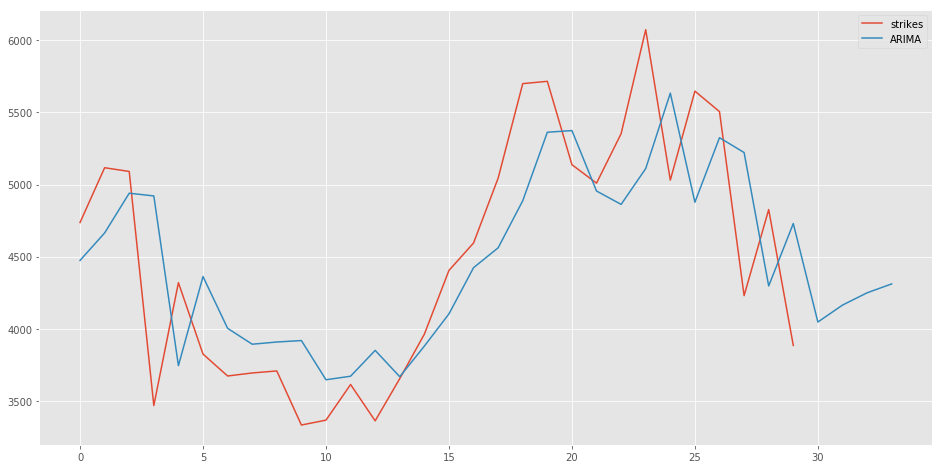

In [66]:
plt.figure(figsize=(16,8))
plt.plot(zzz, label='strikes')
plt.plot(zzz_fit, label='ARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:
#  решение : ARIMA(1,0,0)

In [ ]:
#  Пример 6
#------------------------
#  Annual bituminous coal production in the USA, 
#  1920-1968,  millions of net tons per year. 


In [19]:
zzz = pd.read_csv("6_bicoal.dat", sep=";")
zzz.head()


,v1,year_
0,569,1920
1,416,1921
2,422,1922
3,565,1923
4,484,1924


In [20]:
zzz = zzz["v1"]

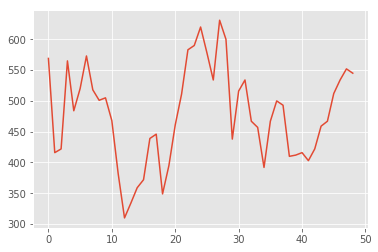

In [21]:
zzz.plot()
plt.show()


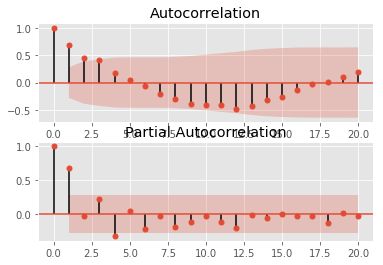

In [22]:
plt.figure()
plt.subplot(211)
plot_acf(zzz, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz, method='ywmle', lags=20, ax=plt.gca())
plt.show()


In [ ]:
#  решение:  ARIMA(1,0,0)  или  ARIMA(4,0,0)

In [23]:
# fit model  ARIMA(1,0,0)
model_1 = ARIMA(zzz, order=(1,0,0))
model_fit_1 = model_1.fit(disp=0)
print(model_fit_1.summary())


                              ARMA Model Results                              
Dep. Variable:                     v1   No. Observations:                   49
Model:                     ARMA(1, 0)   Log Likelihood                -266.892
Method:                       css-mle   S.D. of innovations             55.762
Date:                Thu, 13 Dec 2018   AIC                            539.785
Time:                        20:06:16   BIC                            545.460
Sample:                             0   HQIC                           541.938
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        484.9018     25.187     19.252      0.000     435.536     534.268
ar.L1.v1       0.6954      0.102      6.813      0.000       0.495       0.895
                                    Roots           

In [24]:
# fit model ARIMA(4,0,0)
model_4 = ARIMA(zzz, order=(4,0,0))
model_fit_4 = model_4.fit(disp=0)
print(model_fit_4.summary())


                              ARMA Model Results                              
Dep. Variable:                     v1   No. Observations:                   49
Model:                     ARMA(4, 0)   Log Likelihood                -262.050
Method:                       css-mle   S.D. of innovations             50.095
Date:                Thu, 13 Dec 2018   AIC                            536.100
Time:                        20:07:33   BIC                            547.451
Sample:                             0   HQIC                           540.406
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        481.5213     21.059     22.865      0.000     440.246     522.797
ar.L1.v1       0.8334      0.137      6.098      0.000       0.566       1.101
ar.L2.v1      -0.3443      0.175     -1.965      0.0

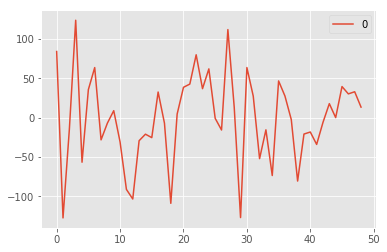

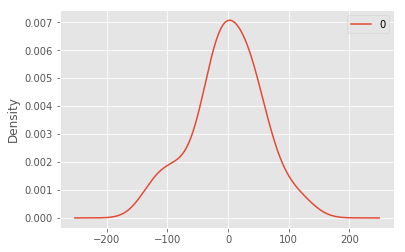

                0
count   49.000000
mean    -1.193492
std     56.956405
min   -127.382966
25%    -28.164533
50%     -0.847936
75%     35.725316
max    123.839593


In [25]:
# анализ остатков
residuals_1 = DataFrame(model_fit_1.resid)

residuals_1.plot()
plt.show()
residuals_1.plot(kind='kde')
plt.show()
print(residuals_1.describe())

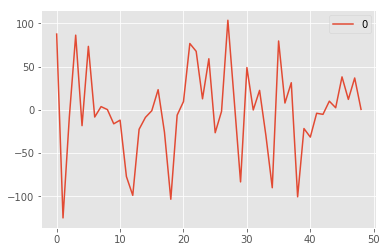

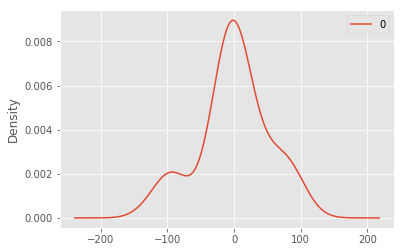

                0
count   49.000000
mean    -0.470411
std     52.384222
min   -124.916341
25%    -21.660753
50%     -0.202342
75%     23.238717
max    103.459096


In [26]:
# анализ остатков
residuals_4 = DataFrame(model_fit_4.resid)

residuals_4.plot()
plt.show()
residuals_4.plot(kind='kde')
plt.show()
print(residuals_4.describe())

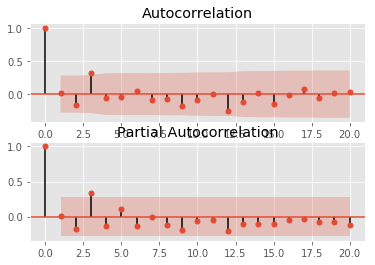

In [27]:
plt.figure()
plt.subplot(211)
plot_acf(residuals_1, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals_1, method='ywmle', lags=20, ax=plt.gca())
plt.show()


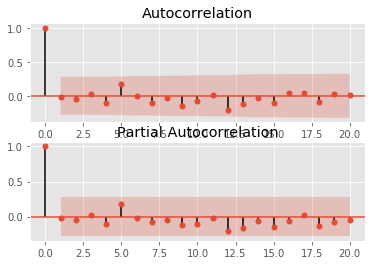

In [82]:
plt.figure()
plt.subplot(211)
plot_acf(residuals_4, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals_4, method='ywmle', lags=20, ax=plt.gca())
plt.show()


In [ ]:
#  Пример 7
#------------------------
#  Ряд продаж продукта.  Известно, что начиная с 100-го наблюдения началась серия различных рекламных акций: рекламные ролики на ТВ, распродажи и пр. Вопрос: были ли значимые изменения в объемах продаж и если были, то когда, в какие моменты времени?
#  Вариант. Контроль качества на предприятии.




In [6]:
zzz = pd.read_csv("7_Trends chapter 06.dat", sep=";")
zzz.head()


,SCORE
0,2202
1,2207
2,2187
3,2217
4,2191


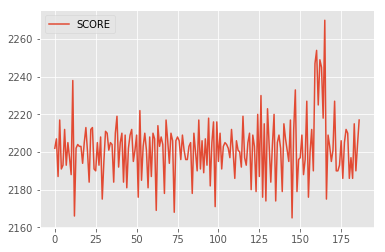

In [7]:
zzz.plot()
plt.show()


In [8]:
zzz_1 = zzz[0:100]

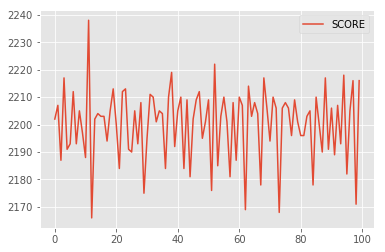

In [9]:
zzz_1.plot()
plt.show()

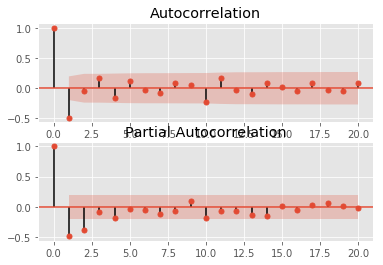

In [10]:
plt.figure()
plt.subplot(211)
plot_acf(zzz_1, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz_1, method='ywmle', lags=20, ax=plt.gca())
plt.show()


In [11]:
# fit model
model = ARIMA(zzz_1, order=(0,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())



                              ARMA Model Results                              
Dep. Variable:                  SCORE   No. Observations:                  100
Model:                     ARMA(0, 1)   Log Likelihood                -374.237
Method:                       css-mle   S.D. of innovations             10.163
Date:                Sun, 16 Dec 2018   AIC                            754.473
Time:                        20:07:37   BIC                            762.289
Sample:                             0   HQIC                           757.636
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2200.1692      0.230   9548.423      0.000    2199.718    2200.621
ma.L1.SCORE    -0.7816      0.083     -9.431      0.000      -0.944      -0.619
                                    Roots       

In [12]:
residuals = DataFrame(model_fit.resid)


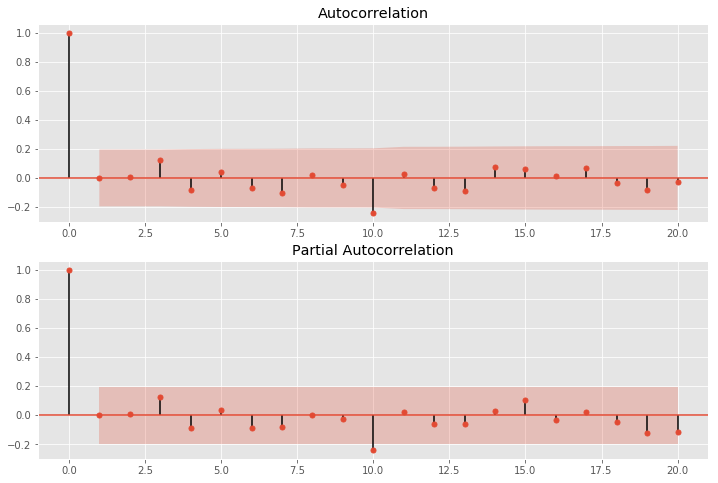

In [13]:

plt.figure(figsize=(12,8))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals, method='ywmle', lags=20, ax=plt.gca())
plt.show()


In [14]:
zzz.shape

(187, 1)

In [15]:
zzz_fit = model_fit.predict(0, 187)
#  zzz_fit

In [16]:
zzz_fit_2 = model_fit.forecast(steps=87, alpha=0.05)

In [17]:
zzz_fit_2[0]

array([2198.79123664, 2200.16921063, 2200.16921063, 2200.16921063,
       2200.16921063, 2200.16921063, 2200.16921063, 2200.16921063,
       2200.16921063, 2200.16921063, 2200.16921063, 2200.16921063,
       2200.16921063, 2200.16921063, 2200.16921063, 2200.16921063,
       2200.16921063, 2200.16921063, 2200.16921063, 2200.16921063,
       2200.16921063, 2200.16921063, 2200.16921063, 2200.16921063,
       2200.16921063, 2200.16921063, 2200.16921063, 2200.16921063,
       2200.16921063, 2200.16921063, 2200.16921063, 2200.16921063,
       2200.16921063, 2200.16921063, 2200.16921063, 2200.16921063,
       2200.16921063, 2200.16921063, 2200.16921063, 2200.16921063,
       2200.16921063, 2200.16921063, 2200.16921063, 2200.16921063,
       2200.16921063, 2200.16921063, 2200.16921063, 2200.16921063,
       2200.16921063, 2200.16921063, 2200.16921063, 2200.16921063,
       2200.16921063, 2200.16921063, 2200.16921063, 2200.16921063,
       2200.16921063, 2200.16921063, 2200.16921063, 2200.16921

In [18]:
zzz_fit_2[2]

array([[2178.87302082, 2218.70945246],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 2225.44914327],
       [2174.88927798, 22

In [19]:
#  forecast (array) – Array of out of sample forecasts
#  stderr (array) – Array of the standard error of the forecasts.
#  conf_int (array) – 2d array of the confidence interval for the forecast

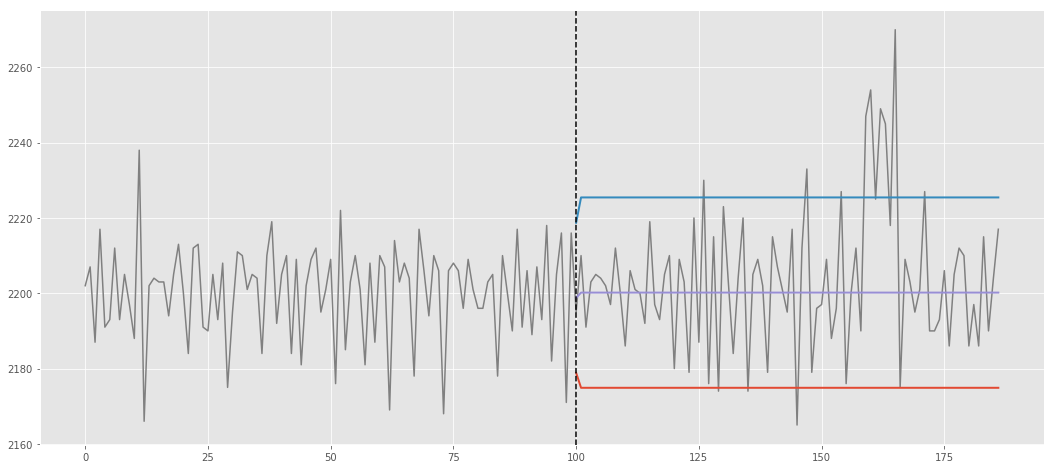

In [20]:
#  import matplotlib.pyplot as plt
#  import numpy as np


x = list(range(len(zzz_1),len(zzz))) # Создаем список из Х для прогноза
x_1 = np.array([x,x]).transpose() # Для доверительного интервала
x_2 = np.array(x) # Для прогноза


plt.figure(figsize=(18,8)) # Размер графика
plt.plot(zzz, color = 'gray') # Исходные данные
plt.plot(x_1,zzz_fit_2[2], linewidth = 2) # Доверительный интервал
plt.plot(x_2, zzz_fit_2[0], linewidth = 2) # Прогноз
plt.axvline(len(zzz_1), c='k', linestyle='dashed') # Вертикальная черта
plt.show()




In [ ]:
#  решение:  ARIMA(0,0,1)

In [ ]:
#  Пример 8
#  Данные о рыночной доле зубной пасты
#  2 временных ряда, содержащих месячные показатели рыночной 
#  доли зубной пасты Крест и Колгейт с 1958 по 1963 год. 
#  В начале этого периода Колгейт занимал ведущую роль на рынке. 
#  Первого августа 1960 года Совет Стоматологов Американской Ассоциации
#  Дантистов подтвердил, что Крест предотвращает кариес. 
#  Проктор и Гембл, продавцы Креста, активно использовали этот факт 
#  в своей рекламе в течение двух недель и продолжали использовать 
#  его позже, хотя и не так активно. 
#  Воздействие на соотношение рыночных долей Креста и Колгейта 
#  оказалось немедленным и драматичным.


In [25]:
zzz = pd.read_csv('8_Trends chapter 10_2.dat', sep=";")
zzz.head()


,crest,colgate,crestpr,colgatpr,week_,date_,step135,step136
0,0.108,0.424,2.07,2.05,1,1,0,0
1,0.166,0.482,2.17,2.10,2,2,0,0
2,0.126,0.428,2.17,2.04,3,3,0,0
3,0.115,0.397,2.07,1.96,4,4,0,0
4,0.119,0.352,2.12,2.06,5,5,0,0


In [26]:
#  zzz.columns[:2]

zzz_1 = zzz[ zzz.columns[:2] ]



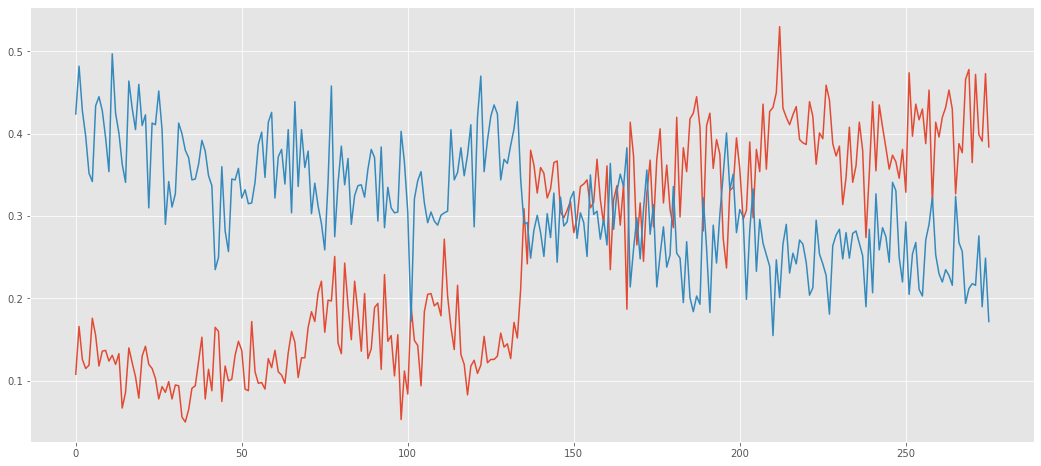

In [27]:
plt.figure(figsize=(18,8)) # Размер графика
plt.plot(zzz_1)
plt.show()

In [28]:
#  Шаг 1.  Ряд до интервенций
#  модель для пасты colgate

zzz_1 = zzz[ zzz.columns[1] ][0:134]

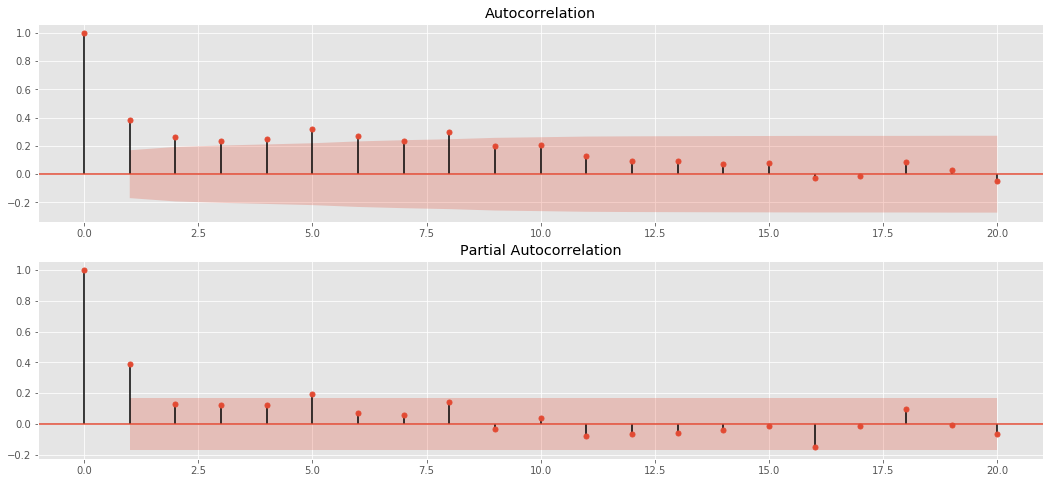

In [9]:
plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(zzz_1, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz_1, method='ywmle', lags=20, ax=plt.gca())
plt.show()


In [10]:
zzz_2 = zzz_1.diff(periods=1)
zzz_3 = zzz_2.dropna()


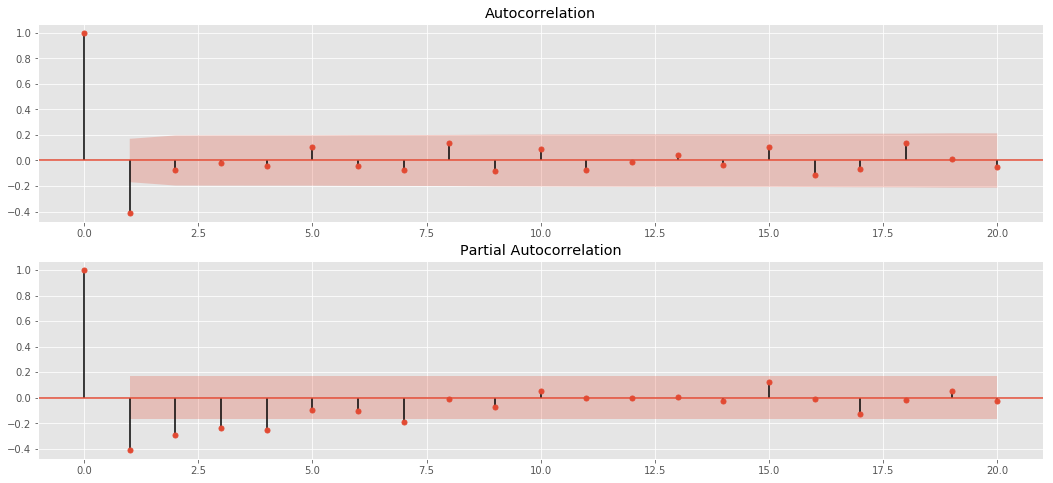

In [11]:
plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(zzz_3, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz_3, method='ywmle', lags=20, ax=plt.gca())
plt.show()


In [12]:
# fit model
model = ARIMA(zzz_1, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:              D.colgate   No. Observations:                  133
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 211.953
Method:                       css-mle   S.D. of innovations              0.049
Date:                Mon, 17 Dec 2018   AIC                           -417.905
Time:                        15:55:48   BIC                           -409.234
Sample:                             1   HQIC                          -414.382
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0002      0.001     -0.195      0.846      -0.002       0.002
ma.L1.D.colgate    -0.8037      0.053    -15.098      0.000      -0.908      -0.699
                                

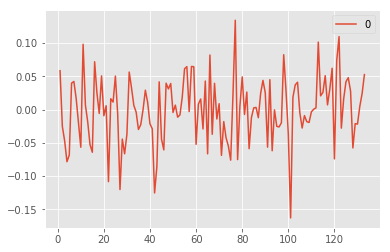

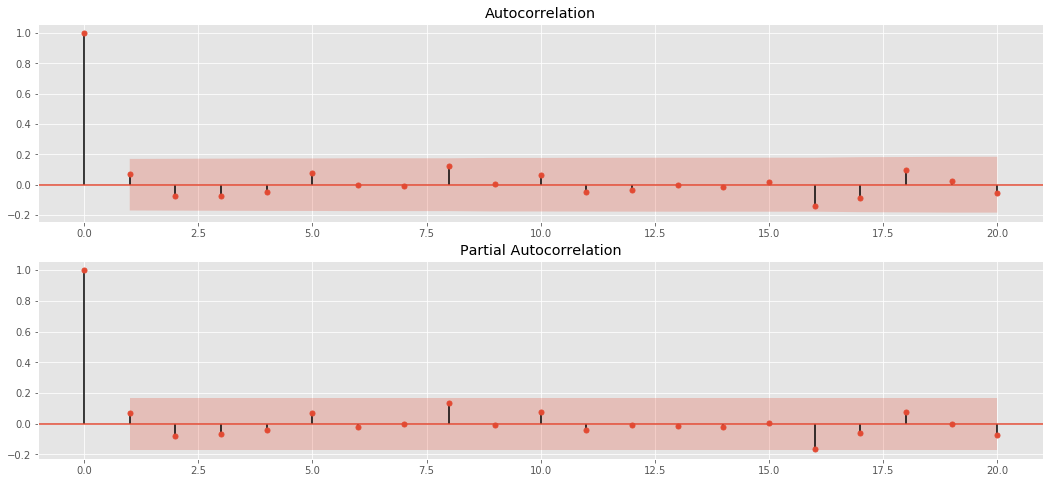

In [13]:
# анализ остатков
residuals = DataFrame(model_fit.resid)

residuals.plot()
plt.show()

# residuals.plot(kind='kde')
# plt.show()
# print(residuals.describe())

plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals, method='ywmle', lags=20, ax=plt.gca())
plt.show()

In [ ]:
#  Вывод: модель для colgate (0, 1, 1)


In [ ]:
#  Шаг 2.  Ряд до интервенций
#  модель для пасты crest


In [43]:
zzz_1 = zzz[ zzz.columns[0] ][0:134]

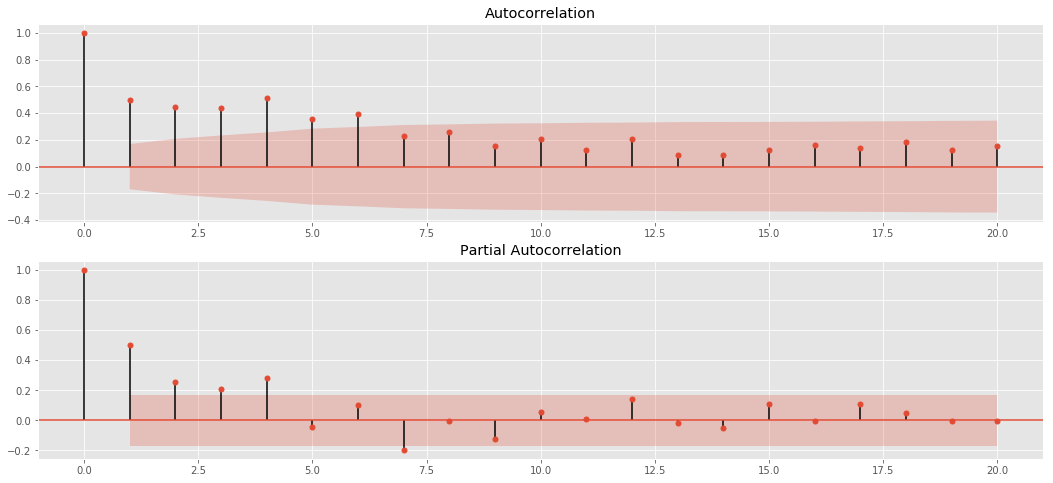

In [44]:
plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(zzz_1, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz_1, method='ywmle', lags=20, ax=plt.gca())
plt.show()


In [45]:
zzz_2 = zzz_1.diff(periods=1)
zzz_3 = zzz_2.dropna()


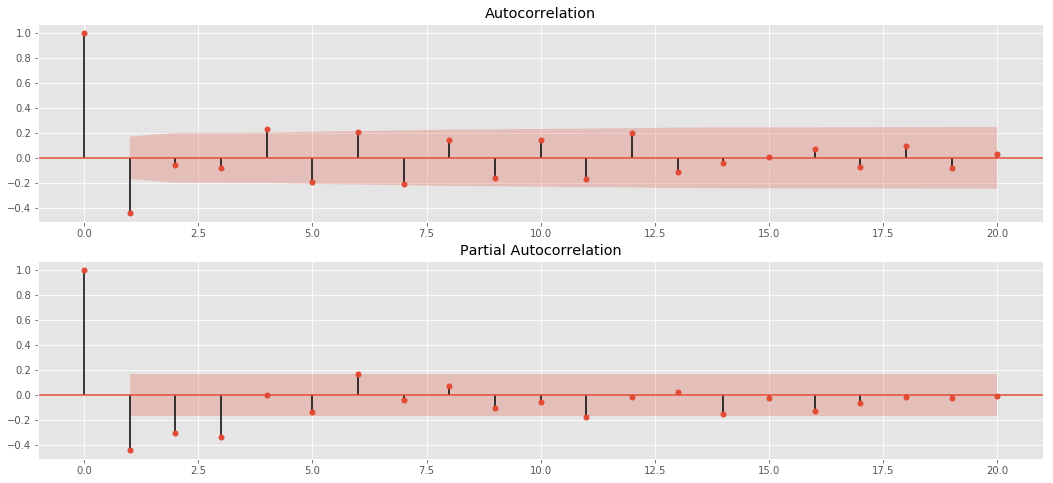

In [46]:
plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(zzz_3, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz_3, method='ywmle', lags=20, ax=plt.gca())
plt.show()


In [47]:
# fit model
model = ARIMA(zzz_1, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.crest   No. Observations:                  133
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 256.119
Method:                       css-mle   S.D. of innovations              0.035
Date:                Sun, 16 Dec 2018   AIC                           -506.238
Time:                        22:58:33   BIC                           -497.567
Sample:                             1   HQIC                          -502.714
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0001      0.001      0.145      0.885      -0.002       0.002
ma.L1.D.crest    -0.6919      0.064    -10.751      0.000      -0.818      -0.566
                                    Root

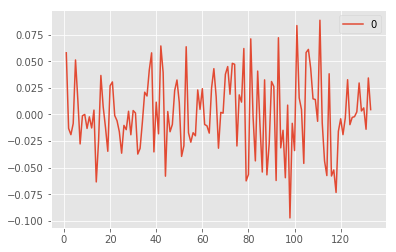

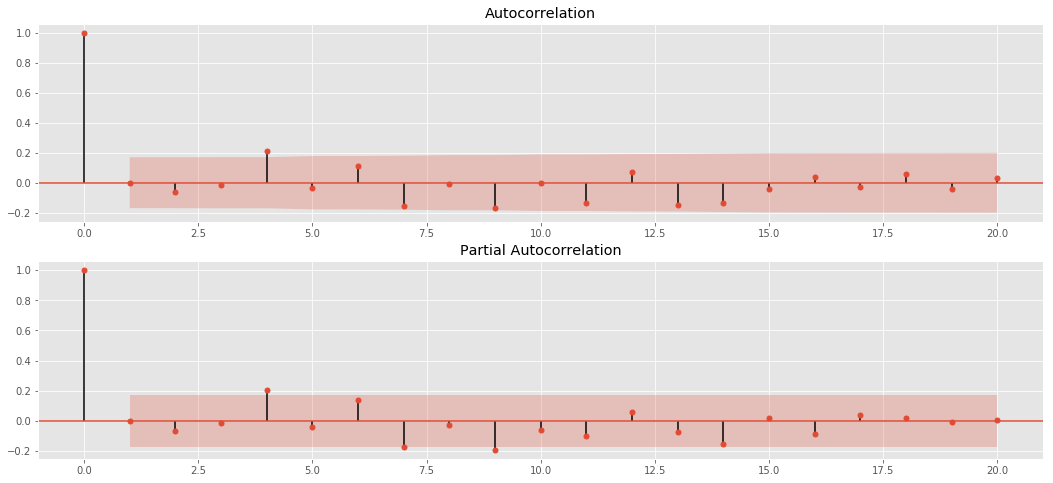

In [48]:
# анализ остатков
residuals = DataFrame(model_fit.resid)

residuals.plot()
plt.show()

# residuals.plot(kind='kde')
# plt.show()
# print(residuals.describe())

plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals, method='ywmle', lags=20, ax=plt.gca())
plt.show()

In [ ]:
#  Вывод: модель для crest (0, 1, 1)


In [ ]:
#  Шаг 3.  Модели для всего ряда
#  модель для пасты colgate

In [14]:
x = zzz[ zzz.columns[6:] ]
x.head()

,step135,step136
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [15]:
zzz_1 = zzz[ zzz.columns[1] ]

In [16]:
# fit model
model = ARIMA(zzz_1, order=(0,1,1), exog = x)
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:              D.colgate   No. Observations:                  275
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 453.081
Method:                       css-mle   S.D. of innovations              0.046
Date:                Mon, 17 Dec 2018   AIC                           -896.162
Time:                        15:56:31   BIC                           -878.078
Sample:                             1   HQIC                          -888.905
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0002      0.001     -0.214      0.831      -0.002       0.001
step135            -0.0981      0.028     -3.526      0.000      -0.153      -0.044
step136             0.0977      

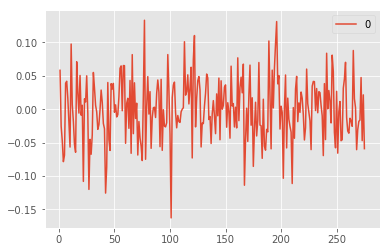

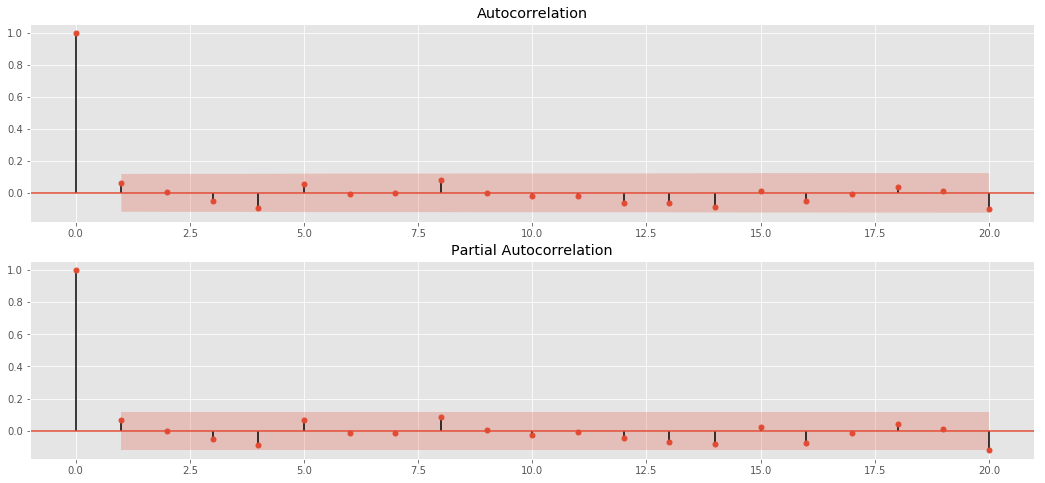

In [17]:
# анализ остатков
residuals = DataFrame(model_fit.resid)

residuals.plot()
plt.show()

# residuals.plot(kind='kde')
# plt.show()
# print(residuals.describe())

plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals, method='ywmle', lags=20, ax=plt.gca())
plt.show()

In [ ]:
#  Шаг 3.  Модели для всего ряда
#  модель для пасты crest

In [18]:
zzz_1 = zzz[ zzz.columns[0] ]

# fit model
model = ARIMA(zzz_1, order=(0,1,1), exog = x)
model_fit = model.fit(disp=0)
print(model_fit.summary())



                             ARIMA Model Results                              
Dep. Variable:                D.crest   No. Observations:                  275
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 469.501
Method:                       css-mle   S.D. of innovations              0.044
Date:                Mon, 17 Dec 2018   AIC                           -929.002
Time:                        16:20:33   BIC                           -910.918
Sample:                             1   HQIC                          -921.744
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0001      0.001      0.132      0.895      -0.002       0.002
step135           0.1490      0.029      5.131      0.000       0.092       0.206
step136          -0.1482      0.029     

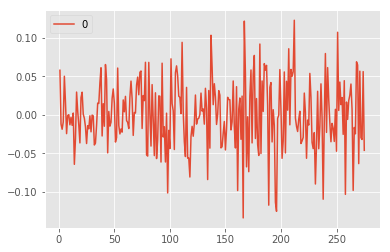

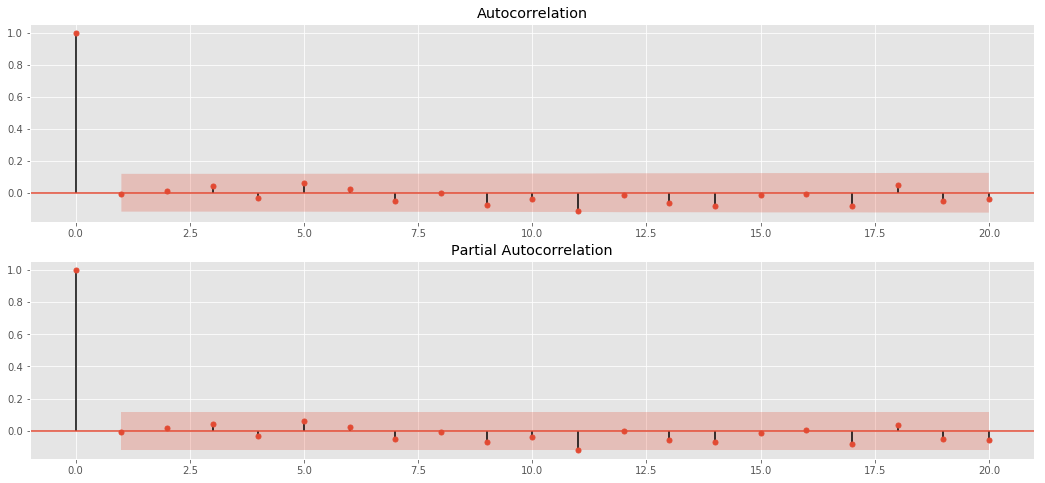

In [19]:
# анализ остатков
residuals = DataFrame(model_fit.resid)

residuals.plot()
plt.show()

# residuals.plot(kind='kde')
# plt.show()
# print(residuals.describe())

plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals, method='ywmle', lags=20, ax=plt.gca())
plt.show()

In [ ]:
#  решение:  ARIMA(0,1,1)

In [ ]:
образец. Не стирать!
-------------------------------------

zzz = pd.read_csv('3_dj.dat')
zzz.head()

zzz.plot()
plt.show()

plt.figure()
plt.subplot(211)
plot_acf(zzz, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz, method='ywmle', lags=20, ax=plt.gca())
plt.show()

zzz_2 = zzz.diff(periods=1)

zzz_2.plot()
plt.show()

zzz_3 = zzz_2.dropna()

plt.figure()
plt.subplot(211)

plot_acf(zzz_3, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz_3, method='ywmle', lags=20, ax=plt.gca())
plt.show()

# fit model
model = ARIMA(zzz, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


# анализ остатков
residuals = DataFrame(model_fit.resid)

residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

plt.figure()
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals, method='ywmle', lags=20, ax=plt.gca())
plt.show()


zzz_fit = model_fit.predict(0, (29+4))
zzz_fit


zzz_2 = zzz.diff(periods=1)

zzz_3 = zzz_2.dropna()




In [ ]:

#  Шаг 3.  Модели для всего ряда

#  модель для пасты colgate

res.1 <- arima(zzz[ ,2], order = c(0, 1, 1), 
               xreg = as.matrix(zzz[ ,7:8]))


res.1

#  модель для пасты crest

res.2 <- arima(zzz[ ,1], order = c(0, 1, 1), 
               xreg = as.matrix(zzz[ ,7:8]))

res.2



xnew.1 = matrix(rep(1, 20), nrow=10, ncol=2)


pred.1 <-predict(res.2, n.ahead = 10, se.fit = TRUE,
                 xreg = as.matrix(zzz[ ,7:8]), newxreg = xnew.1)

names(pred.1)

plot(zzz[ ,1], type="l", col="black", xlim=c(0, 290))
lines(277:286, pred.1$pred, type="l", col="red")



zzz.3 <- zzz[141:276 ,1]

res.5 <- arima(zzz[ ,1], order = c(0, 1, 1))

pred.2 <-predict(res.5, n.ahead = 10, se.fit = TRUE)


plot(zzz.3, type="l", col="black", xlim=c(0, 150))
lines(137:146, pred.1$pred, type="l", col="red")


#   lines(pred.1$pred,col="red")
#   lines(pred.1$pred+2*pred.1$se,col="red",lty=3)
#   lines(pred.1$pred-2*pred.1$se,col="red",lty=3)







In [ ]:


zzz <- read.table("9_computer.dat", header=T, sep="", dec=".")

zzz.1 <- zzz[,1]

res.0 <- arima(zzz, order = c(0, 1, 0))


par(mfrow=c(1,2))

acf(res.0$residuals)
pacf(res.0$residuals)

par(mfrow=c(1,1))


sum(res.0$residuals^2)
sum(res.1$residuals^2)

-------------------------------------
#  Example 1
#  Time series with 36 values белый шум
#------------------------

zzz <- read.table("1_wn.dat", header=T, sep="", dec=".")

zzz.1 <- zzz[,1]


plot(1:length(zzz.1), zzz.1, type="l")

par(mfrow=c(1,2))

acf(zzz.1)
pacf(zzz.1)

par(mfrow=c(1,1))

#  Example 2
#------------------------
#  White noise series

zzz <- read.table("2_wnoise.dat", header=T, sep="", dec=".")

zzz.1 <- zzz[,1]


plot(1:length(zzz.1), zzz.1, type="l")

par(mfrow=c(1,2))

acf(zzz.1)
pacf(zzz.1)

par(mfrow=c(1,1))

#  Example 3
#------------------------
#  Dow-Jones index on 251 trading days ending 26 Aug 1994
#  		решение : случайное блуждание ARIMA(0,1,0)

zzz <- read.table("3_dj.dat", header=T, sep="", dec=".")

zzz.1 <- zzz[,1]


plot(1:length(zzz.1), zzz.1, type="l")

par(mfrow=c(1,2))

acf(zzz.1)
pacf(zzz.1)

par(mfrow=c(1,1))

#     difference the time series d times  
zzz.2 <- diff(zzz.1, differences=1)

plot(1:length(zzz.2), zzz.2, type="l")

par(mfrow=c(1,2))

acf(zzz.2)
pacf(zzz.2)

par(mfrow=c(1,1))

#  Example 4
#------------------------
#  Daily closing IBM stock prices.
#  			решение : случайное блуждание ARIMA(0,1,0)

zzz <- read.table("4_ibm2.dat", header=T, sep="", dec=".")

zzz.1 <- zzz[,1]


plot(1:length(zzz.1), zzz.1, type="l")

par(mfrow=c(1,2))

acf(zzz.1)
pacf(zzz.1)

par(mfrow=c(1,1))

#     difference the time series d times  
zzz.2 <- diff(zzz.1, differences=1)

plot(1:length(zzz.2), zzz.2, type="l")

par(mfrow=c(1,2))

acf(zzz.2)
pacf(zzz.2)

par(mfrow=c(1,1))


#  Example 5
#------------------------
#  Number of strikes in the US from 1951 to 1980.
#  		решение:  ARIMA(1,0,0)

zzz <- read.table("5_strike.dat", header=T, sep=";", dec=".")

zzz.1 <- zzz[,1]


plot(1:length(zzz.1), zzz.1, type="l")


par(mfrow=c(1,2))

acf(zzz.1)
pacf(zzz.1)

par(mfrow=c(1,1))


#     difference the time series d times  
zzz.2 <- diff(zzz.1, differences=1)

plot(1:length(zzz.2), zzz.2, type="l")

par(mfrow=c(1,2))

acf(zzz.2)
pacf(zzz.2)

par(mfrow=c(1,1))

res.1 <- arima(zzz.1, order = c(1, 0, 0))

res.1

tsdiag(res.1)


#  names(res.1)



#  The Ljung–Box test.

#  H0: The data are independently distributed 
#    (i.e. the correlations in the population from which the 
#      sample is taken are 0, so that any observed correlations 
#      in the data result from randomness of the sampling process).
#  Ha: The data are not independently distributed; 
#    they exhibit serial correlation. 
# it tests the "overall" randomness based on a number of lags, 
# and is therefore a portmanteau test.


Box.test(res.1$residuals, lag = 2, type = "Ljung-Box", fitdf = 1)

# гипотеза независимости не отвергается

# Box.test(res.1$residuals, lag = 10, type = "Ljung-Box", fitdf = 1)




# Какая модель лучше? (1, 0, 0) или (0, 1, 0) 

# а) (0, 1, 0) - частный случай (1, 0, 0)
# б) сумма квадратов остатков?

res.0 <- arima(zzz.1, order = c(0, 1, 0))

res.0
res.1


sum(res.0$residuals^2)
sum(res.1$residuals^2)


par(mfrow=c(1,2))

acf(res.0$residuals)
pacf(res.0$residuals)

par(mfrow=c(1,1))

par(mfrow=c(1,2))

acf(res.1$residuals)
pacf(res.1$residuals)

par(mfrow=c(1,1))


#  Example 6
#------------------------
#  Annual bituminous coal production in the USA, 
#  		1920-1968,  millions of net tons per year. 
#  		решение:  ARIMA(1,0,0)  или  ARIMA(4,0,0)


zzz <- read.table("6_bicoal.dat", header=T, sep=";", dec=".")

zzz.1 <- zzz[,1]


plot(1:length(zzz.1), zzz.1, type="l")

par(mfrow=c(1,2))

acf(zzz.1)
pacf(zzz.1)

par(mfrow=c(1,1))


res.1 <- arima(zzz.1, order = c(1, 0, 0))

res.4 <- arima(zzz.1, order = c(4, 0, 0))


res.1
res.4


tsdiag(res.1)


#  names(res.1)



#  The Ljung–Box test.

#  H0: The data are independently distributed 
#    (i.e. the correlations in the population from which the 
#      sample is taken are 0, so that any observed correlations 
#      in the data result from randomness of the sampling process).
#  Ha: The data are not independently distributed; 
#    they exhibit serial correlation. 
# it tests the "overall" randomness based on a number of lags, 
# and is therefore a portmanteau test.


Box.test(res.4$residuals, lag = 5, type = "Ljung-Box", fitdf = 4)

# гипотеза независимости не отвергается


# Какая модель лучше? (1, 0, 0) или (4, 0, 0) 


sum(res.1$residuals^2)
sum(res.4$residuals^2)


# p-значения. Проверяется H_0: коэффициент=0
(1-pnorm(abs(res.1$coef)/sqrt(diag(res.1$var.coef))))*2
(1-pnorm(abs(res.4$coef)/sqrt(diag(res.4$var.coef))))*2

res.4$coef

names(res.4)


#  Example 7
#------------------------
#  Ряд продаж продукта.  Известно, что начиная с 100-го наблюдения началась серия различных рекламных акций: рекламные ролики на ТВ, распродажи и пр. Вопрос: были ли значимые изменения в объемах продаж и если были, то когда, в какие моменты времени?
#  Вариант. Контроль качества на предприятии.
#  решение:  ARIMA(0,0,1)


zzz <- read.table("7_Trends chapter 06.dat", header=T, sep=";", dec=".")

zzz.1 <- zzz[,1]


plot(1:length(zzz.1), zzz.1, type="l")

par(mfrow=c(1,2))

acf(zzz.1[1:100])
pacf(zzz.1[1:100])

par(mfrow=c(1,1))


res.1 <- arima(zzz.1[1:100], order = c(0, 0, 1))


pred.1 <-predict(res.1, n.ahead = 87, se.fit = TRUE)

res.1


plot(1:length(zzz.1), zzz.1, type="l")

lines(pred.1$pred,col="red")
lines(pred.1$pred+2*pred.1$se,col="red",lty=3)
lines(pred.1$pred-2*pred.1$se,col="red",lty=3)


#  ARIMA nonseasonal



#  Example 8
#  Данные о рыночной доле зубной пасты
#  2 временных ряда, содержащих месячные показатели рыночной 
#  доли зубной пасты Крест и Колгейт с 1958 по 1963 год. 
#  В начале этого периода Колгейт занимал ведущую роль на рынке. 
#  Первого августа 1960 года Совет Стоматологов Американской Ассоциации
#  Дантистов подтвердил, что Крест предотвращает кариес. 
#  Проктор и Гембл, продавцы Креста, активно использовали этот факт 
#  в своей рекламе в течение двух недель и продолжали использовать 
#  его позже, хотя и не так активно. 
#  Воздействие на соотношение рыночных долей Креста и Колгейта 
#  оказалось немедленным и драматичным.
#  есть решение  ARIMA(0,1,1)


#  Шаг 0.  предварительный анализ
zzz <- read.table("8_Trends chapter 10_2.dat", header=T, sep=";", dec=".")

names(zzz)


plot(1:nrow(zzz), zzz[ ,1], type="l", col="red")
lines(1:nrow(zzz), zzz[ ,2], type="l", col="blue")


#  вариант графика: рисуем поверх предыдущего
#  plot(1:nrow(zzz), zzz[ ,1], type="l")
#  lines(1:nrow(zzz), zzz[ ,2], type="l")
#  lines(134:nrow(zzz), zzz[134:nrow(zzz) ,1], type="l", col="red")
#  lines(134:nrow(zzz), zzz[134:nrow(zzz) ,2], type="l", col="blue")


#  Шаг 1.  Ряд до интервенций
#  модель для пасты colgate


zzz.1 <- zzz[ ,2]


par(mfrow=c(1,2))

acf(zzz.1[1:134])
pacf(zzz.1[1:134])

par(mfrow=c(1,1))


res.1 <- arima(zzz.1[1:134], order = c(0, 1, 0))


par(mfrow=c(1,2))

acf(res.1$residuals)
pacf(res.1$residuals)

par(mfrow=c(1,1))


res.2 <- arima(zzz.1[1:134], order = c(0, 1, 1))


par(mfrow=c(1,2))

acf(res.2$residuals)
pacf(res.2$residuals)

par(mfrow=c(1,1))

#  Вывод: модель для colgate (0, 1, 1)


#  Шаг 2.  Ряд до интервенций
#  модель для пасты crest

#  модель для пасты crest

zzz.1 <- zzz[,1]


par(mfrow=c(1,2))

acf(zzz.1[1:134])
pacf(zzz.1[1:134])

par(mfrow=c(1,1))


res.1 <- arima(zzz.1[1:134], order = c(0, 1, 0))


par(mfrow=c(1,2))

acf(res.1$residuals)
pacf(res.1$residuals)

par(mfrow=c(1,1))


res.2 <- arima(zzz.1[1:134], order = c(0, 1, 1))


par(mfrow=c(1,2))

acf(res.2$residuals)
pacf(res.2$residuals)

par(mfrow=c(1,1))

#  Вывод: модель для crest (0, 1, 1)


#  Шаг 3.  Модели для всего ряда

#  модель для пасты colgate

res.1 <- arima(zzz[ ,2], order = c(0, 1, 1), 
               xreg = as.matrix(zzz[ ,7:8]))


res.1

#  модель для пасты crest

res.2 <- arima(zzz[ ,1], order = c(0, 1, 1), 
               xreg = as.matrix(zzz[ ,7:8]))

res.2



xnew.1 = matrix(rep(1, 20), nrow=10, ncol=2)


pred.1 <-predict(res.2, n.ahead = 10, se.fit = TRUE,
                 xreg = as.matrix(zzz[ ,7:8]), newxreg = xnew.1)

names(pred.1)

plot(zzz[ ,1], type="l", col="black", xlim=c(0, 290))
lines(277:286, pred.1$pred, type="l", col="red")



zzz.3 <- zzz[141:276 ,1]

res.5 <- arima(zzz[ ,1], order = c(0, 1, 1))

pred.2 <-predict(res.5, n.ahead = 10, se.fit = TRUE)


plot(zzz.3, type="l", col="black", xlim=c(0, 150))
lines(137:146, pred.1$pred, type="l", col="red")


#   lines(pred.1$pred,col="red")
#   lines(pred.1$pred+2*pred.1$se,col="red",lty=3)
#   lines(pred.1$pred-2*pred.1$se,col="red",lty=3)






In [4]:
zzz = pd.read_csv('9_computer.dat')
zzz.head()

,V1
0,88
1,84
2,85
3,85
4,84


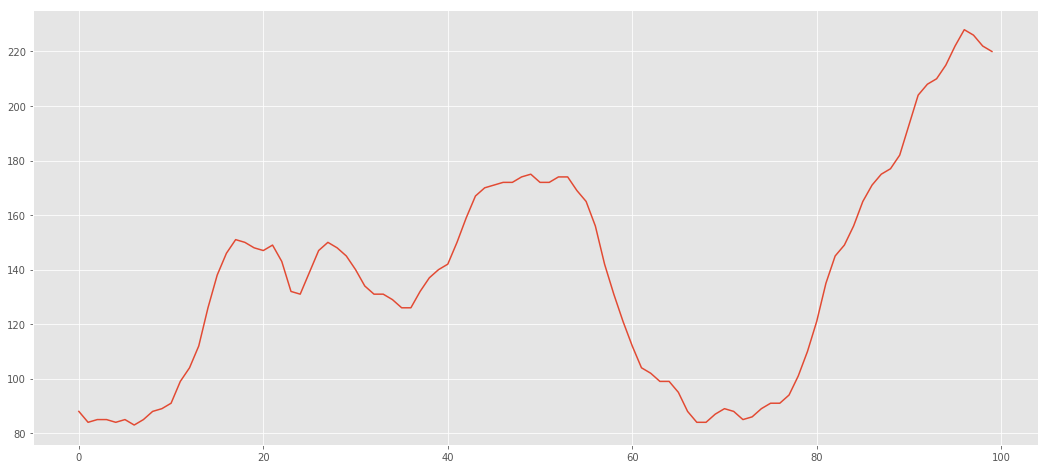

In [5]:
plt.figure(figsize=(18,8)) # Размер графика
plt.plot(zzz)
plt.show()

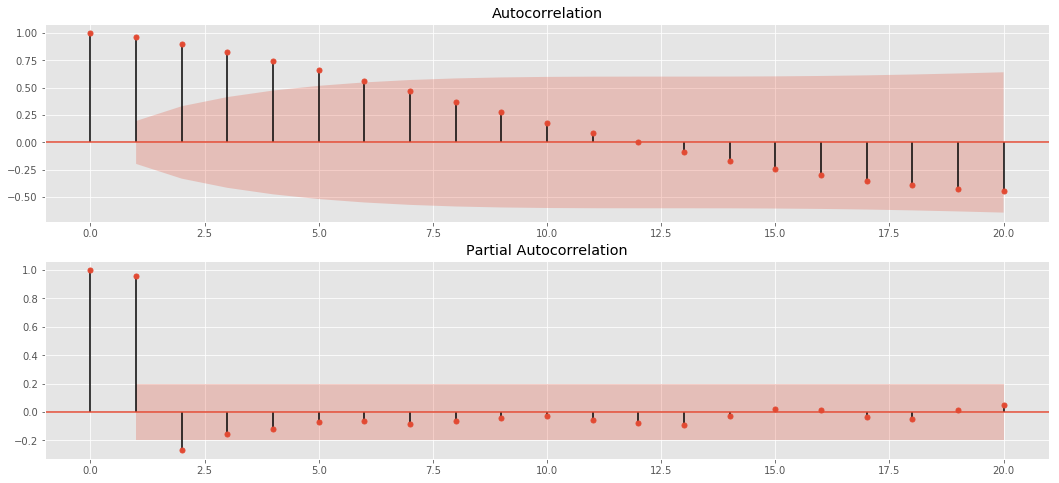

In [6]:
plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(zzz, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz, method='ywmle', lags=20, ax=plt.gca())
plt.show()


In [7]:
zzz_2 = zzz.diff(periods=1)
zzz_3 = zzz_2.dropna()


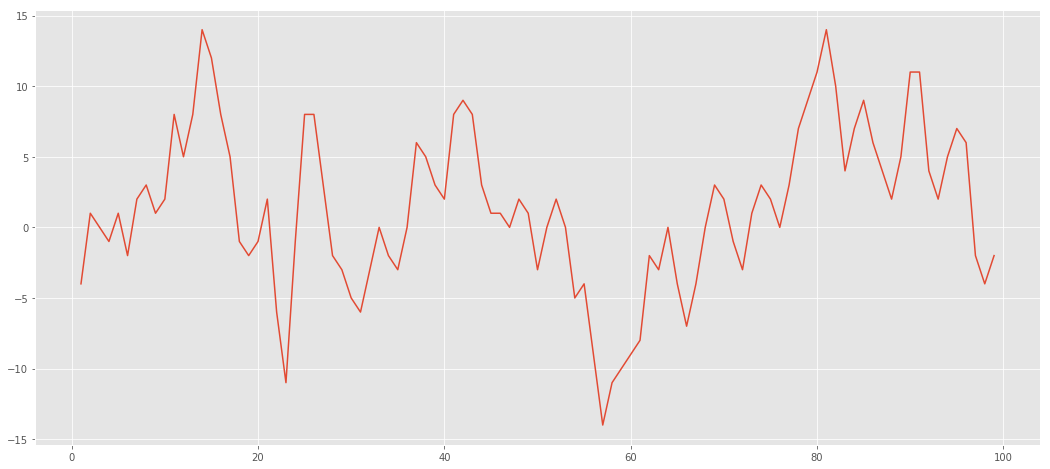

In [8]:
plt.figure(figsize=(18,8)) # Размер графика
plt.plot(zzz_3)
plt.show()

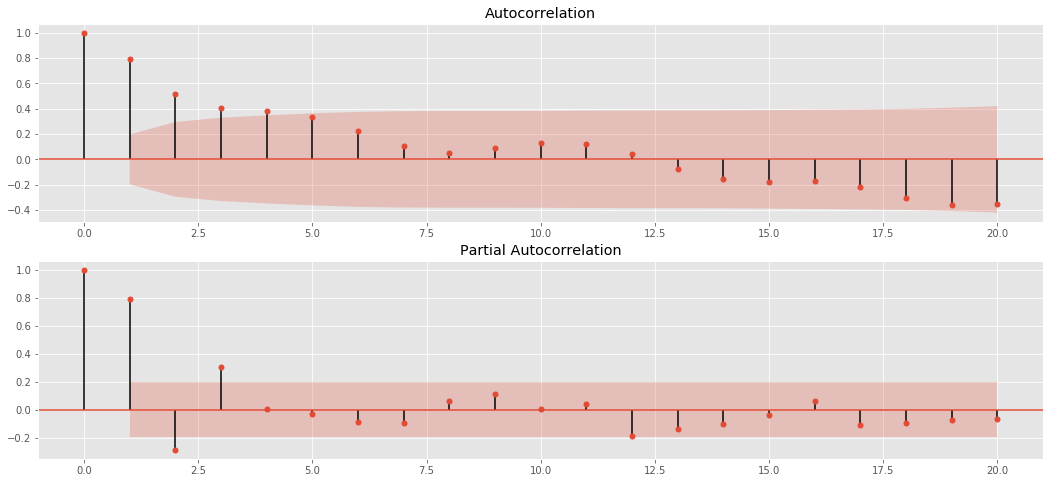

In [9]:
plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(zzz_3, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz_3, method='ywmle', lags=20, ax=plt.gca())
plt.show()


In [23]:
zzz_1 = zzz[ zzz.columns[0] ].values

In [24]:
zzz_2 = zzz_1.diff(periods=1)
zzz_3 = zzz_1.dropna()


AttributeError: 'numpy.ndarray' object has no attribute 'diff'

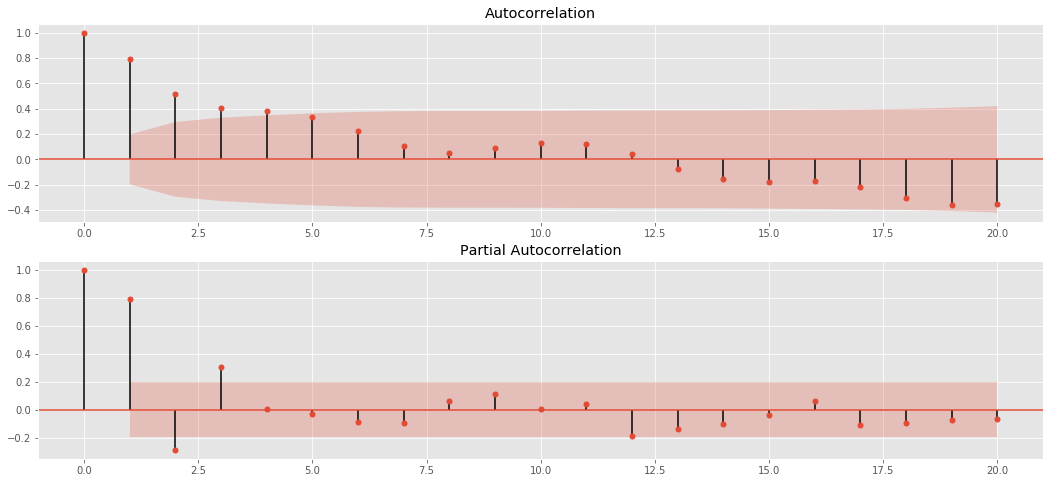

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(zzz_3, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(zzz_3, method='ywmle', lags=20, ax=plt.gca())
plt.show()

In [26]:
# fit model
model = ARIMA(zzz_1, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())



                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Thu, 15 Aug 2019   AIC                            515.579
Time:                        15:43:53   BIC                            525.960
Sample:                             1   HQIC                           519.779
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1205      1.286      0.871      0.386      -1.400       3.641
ar.L1.D.y      0.6344      0.087      7.317      0.000       0.464       0.804
ma.L1.D.y      0.5297      0.089      5.932      0.0

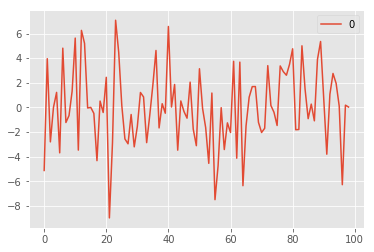

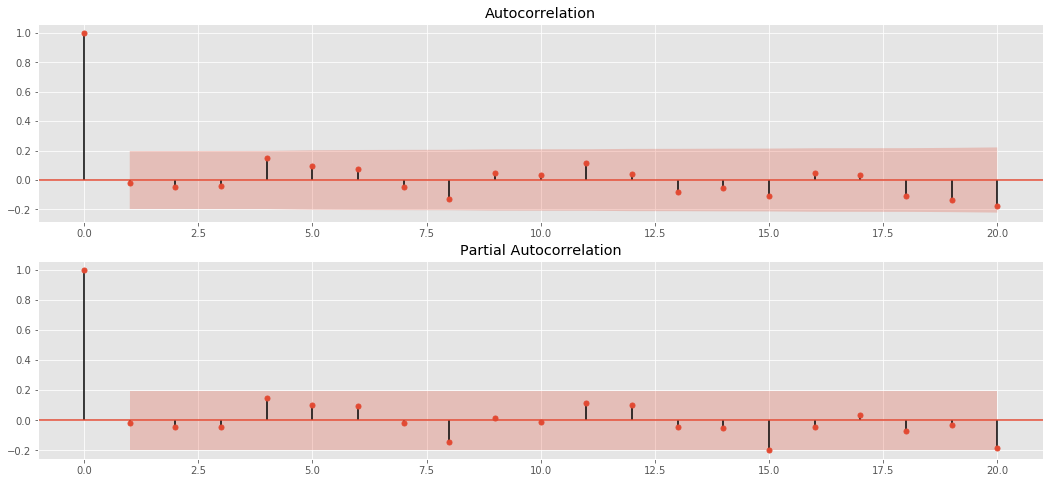

In [27]:
# анализ остатков
residuals = DataFrame(model_fit.resid)

residuals.plot()
plt.show()

# residuals.plot(kind='kde')
# plt.show()
# print(residuals.describe())

plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals, method='ywmle', lags=20, ax=plt.gca())
plt.show()

In [28]:
zzz_fit = model_fit.predict(start= 1, end=(100+8))
zzz_fit

array([  1.1204933 ,  -2.9578539 ,   2.79885215,  -1.00803462,
        -0.22047388,   1.68835155,  -2.81091353,   4.22609111,
         1.66337745,   0.69267183,   2.3709128 ,   8.46635657,
         1.74539295,   8.79769969,  12.04649548,   7.99746755,
         5.48596862,   3.3241072 ,  -2.51516307,  -0.58616301,
        -0.4438882 ,   2.97295411,  -8.14949926,  -8.07826464,
         3.52468711,   7.85520584,   5.56132482,   0.95605397,
        -2.42487089,  -1.79805937,  -4.45821915,  -4.21319777,
        -0.85078045,   0.86034846,  -2.37417556,  -1.82491275,
         1.37634752,   6.66504697,   2.69954798,   2.47194063,
         1.42843604,   8.96559258,   6.1372201 ,   6.47134395,
         0.47401574,   1.3226708 ,   0.87313718,  -0.0528128 ,
         2.76580099,   0.10870937,  -3.1400999 ,   2.07300375,
         1.63975339,  -0.45889033,  -5.16757862,  -1.50931224,
        -9.26744279, -10.97829404,  -6.57984861,  -7.74564201,
        -5.96405135,  -5.7436936 ,   1.12399352,  -3.67

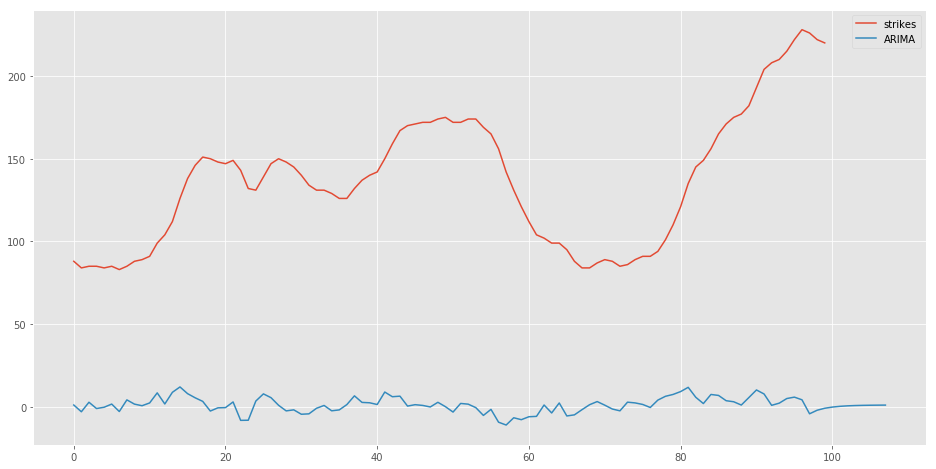

In [29]:
plt.figure(figsize=(16,8))
plt.plot(zzz, label='strikes')
plt.plot(zzz_fit, label='ARIMA')
plt.legend(loc='best')
plt.show()

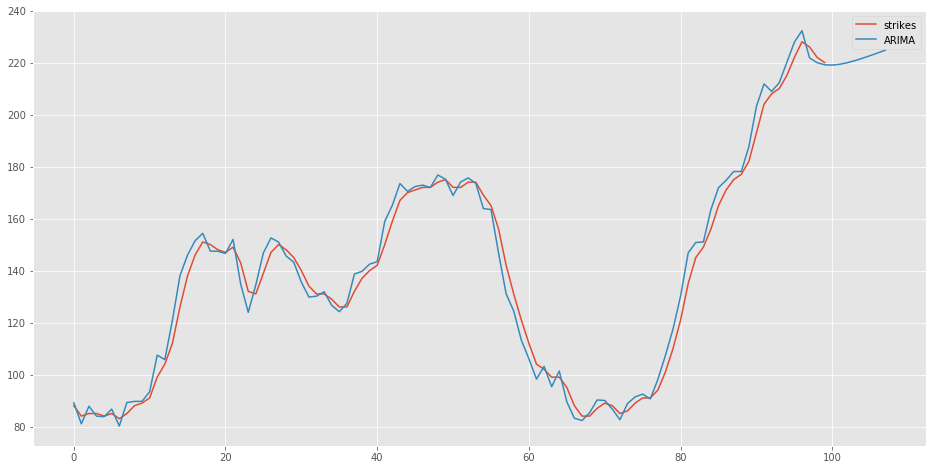

In [30]:

zzz_fit = model_fit.predict(start= 1, end=(100+8), typ='levels')
zzz_fit

plt.figure(figsize=(16,8))
plt.plot(zzz, label='strikes')
plt.plot(zzz_fit, label='ARIMA')
plt.legend(loc='best')
plt.show()

Подгонка неверная.
Кто виноват и что делать?

In [17]:
#  В процедуре использовались правильные данные?

zzz_1

array([ 88,  84,  85,  85,  84,  85,  83,  85,  88,  89,  91,  99, 104,
       112, 126, 138, 146, 151, 150, 148, 147, 149, 143, 132, 131, 139,
       147, 150, 148, 145, 140, 134, 131, 131, 129, 126, 126, 132, 137,
       140, 142, 150, 159, 167, 170, 171, 172, 172, 174, 175, 172, 172,
       174, 174, 169, 165, 156, 142, 131, 121, 112, 104, 102,  99,  99,
        95,  88,  84,  84,  87,  89,  88,  85,  86,  89,  91,  91,  94,
       101, 110, 121, 135, 145, 149, 156, 165, 171, 175, 177, 182, 193,
       204, 208, 210, 215, 222, 228, 226, 222, 220], dtype=int64)

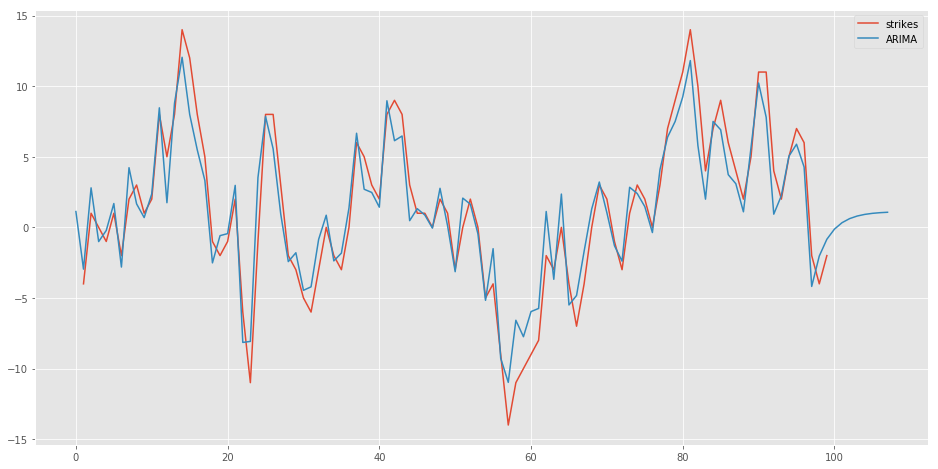

In [18]:
#  Сравниваем подгонку и ряд из разностей.
#  Они подозрительно близки...

plt.figure(figsize=(16,8))
plt.plot(zzz_3, label='strikes')
plt.plot(zzz_fit, label='ARIMA')
plt.legend(loc='best')
plt.show()

Гипотеза:
    процедура строит подгонку и прогноз для разностей,
    если они были в модели
Проверяем

In [19]:

#  то же самое, но для разностей
# fit model
model_2 = ARIMA(zzz_3, order=(1,0,1))
model_fit_2 = model_2.fit(disp=0)
print(model_fit_2.summary())



                              ARMA Model Results                              
Dep. Variable:                     V1   No. Observations:                   99
Model:                     ARMA(1, 1)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Thu, 15 Aug 2019   AIC                            515.579
Time:                        14:27:32   BIC                            525.960
Sample:                             0   HQIC                           519.779
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1205      1.286      0.871      0.386      -1.400       3.641
ar.L1.V1       0.6344      0.087      7.317      0.000       0.464       0.804
ma.L1.V1       0.5297      0.089      5.932      0.0

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


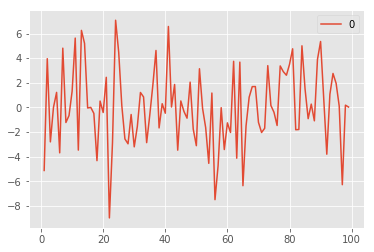

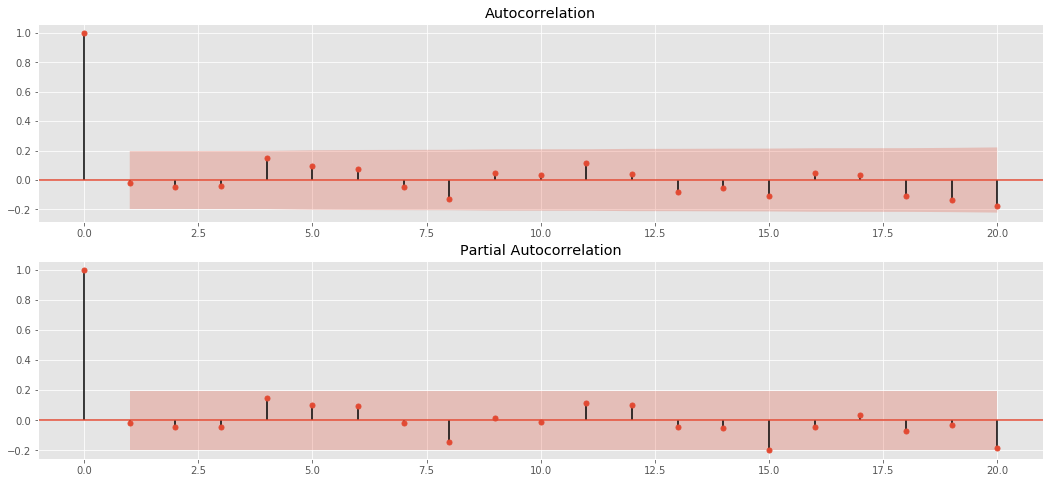

In [20]:
# анализ остатков
residuals_2 = DataFrame(model_fit_2.resid)

residuals_2.plot()
plt.show()

# residuals.plot(kind='kde')
# plt.show()
# print(residuals.describe())

plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(residuals_2, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals_2, method='ywmle', lags=20, ax=plt.gca())
plt.show()

In [21]:
zzz_fit_2 = model_fit_2.predict(start= 1, end=(100+8))
zzz_fit_2

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


1      -2.957854
2       2.798852
3      -1.008035
4      -0.220474
5       1.688352
6      -2.810914
7       4.226091
8       1.663377
9       0.692672
10      2.370913
11      8.466357
12      1.745393
13      8.797700
14     12.046495
15      7.997468
16      5.485969
17      3.324107
18     -2.515163
19     -0.586163
20     -0.443888
21      2.972954
22     -8.149499
23     -8.078265
24      3.524687
25      7.855206
26      5.561325
27      0.956054
28     -2.424871
29     -1.798059
30     -4.458219
         ...    
79      7.502526
80      9.240345
81     11.812026
82      5.793530
83      1.997123
84      7.500290
85      6.913393
86      3.732067
87      3.089082
88      1.101535
89      5.646547
90     10.223460
91      7.799063
92      0.934790
93      2.242667
94      5.042088
95      5.887368
96      4.275554
97     -4.183214
98     -2.030731
99     -0.842767
100    -0.124935
101     0.330434
102     0.619306
103     0.802556
104     0.918805
105     0.992549
106     1.0393

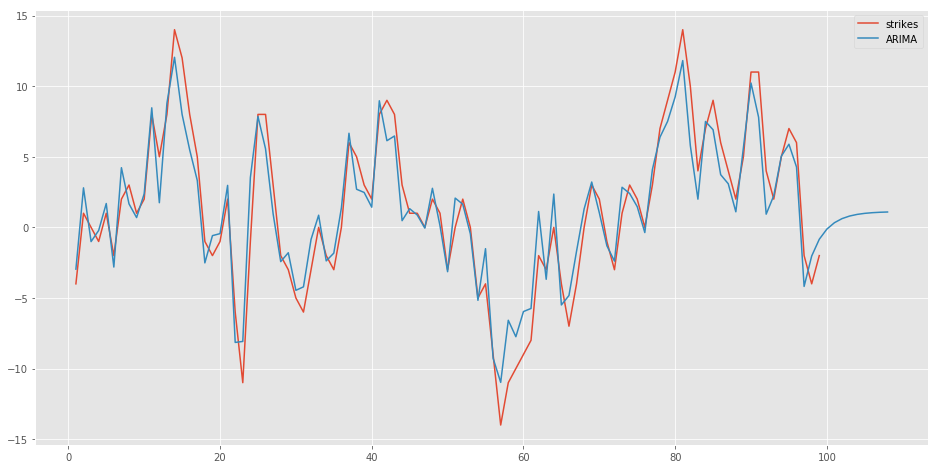

In [22]:
plt.figure(figsize=(16,8))
plt.plot(zzz_3, label='strikes')
plt.plot(zzz_fit_2, label='ARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:
typ='linear',

In [ ]:
#  то же самое, но для разностей
# fit model
model_2 = ARIMA(zzz_3, order=(1,1,1))
model_fit_2 = model_2.fit(disp=0)
print(model_fit_2.summary())



In [ ]:
          Jan      Feb      Mar      Apr      May      Jun
1961 6.110186 6.053775 6.171715 6.199300 6.232556 6.368779
          Jul      Aug      Sep      Oct      Nov      Dec
1961 6.507294 6.502906 6.324698 6.209008 6.063487 6.168025
